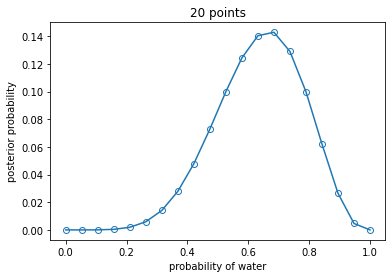

In [2]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
gridsize = 20
p_grid = np.linspace(0,1,gridsize)
prior = np.repeat(1,gridsize)
likelihood = binom.pmf(6,9,p_grid)
unstd_posterior = likelihood * prior
posterior = unstd_posterior/sum(unstd_posterior)
plt.plot(p_grid, posterior, "o-", fillstyle="none")
plt.xlabel("probability of water")
plt.ylabel("posterior probability")
plt.title("%d points" % gridsize)
plt.show()

In [3]:
import pymc3 as pm
data = np.repeat((0, 1), (3, 6))
with pm.Model() as normal_approximation:
    p = pm.Uniform('p', 0, 1)
    w = pm.Binomial('w', n=len(data), p=p, observed=data.sum())
    mean_q = pm.find_MAP()
    std_q = ((1/pm.find_hessian(mean_q, vars=[p]))**0.5)[0]
mean_q['p'], std_q

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


(array(0.66666667), array([0.15713484]))

In [ ]:
baseModel = pm.Model()
with baseModel:
    p = pm.Uniform('p', 0, 1)
    w = pm.Binomial('w', n=len(data), p=p, observed=data.sum())
    trace = pm.sample(10000, return_inferencedata=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 50_000 draw iterations (4_000 + 200_000 draws total) took 379 seconds.


In [24]:
from scipy.stats import mode
import numpy as mp

trace['p']
def PI(samples, prob:float=0.89):
    # assume its symmetric
    side = (1-prob)/2
    return np.quantile(samples, (side, 1-side))

def MAP(samples, precison = 4):
    return mode(np.round(samples, 4))
PI(trace['p'])
MAP(trace['p'])

ModeResult(mode=array([0.6536]), count=array([91]))